In [50]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [51]:
file = "AB_US_2020.csv"

In [52]:
original_df = pd.read_csv(file)
original_df.head()

/var/folders/cj/z8j97wwj1m9g66nnllvz8b280000gn/T/ipykernel_30447/2032090941.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv(file)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,Asheville,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,Asheville,35.59779,-82.55540,Entire home/apt,470,1,114,7/9/2020,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,Asheville,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,Asheville,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,Asheville,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [53]:
original_df.drop(["longitude", "latitude","neighbourhood_group"], axis=1, inplace=True)

In [54]:
original_df.head()

,id,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,Asheville,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,Asheville,Entire home/apt,470,1,114,7/9/2020,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,Asheville,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,Asheville,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,Asheville,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [55]:
df = original_df.set_index("id")
df.head()

,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
id,,,,,,,,,,,,,
38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,Asheville,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
80905,French Chic Loft,427027,Celeste,Asheville,Entire home/apt,470,1,114,7/9/2020,1.03,11,288,Asheville
108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,Asheville,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,Asheville,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
160594,Historic Grove Park,769252,Elizabeth,Asheville,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [56]:
df_rename = df.rename(columns={
    "city" : "City",
    "id" : "ID",
    "name" : "Listing Name",
    "host_id" : "Host ID",
    "host_name" : "Host Name",
    "neighbourhood" : "Neighbourhood",
    "room_type" : "Room Type",
    "price": "Price",
    "minimum_nights": "Minimum Nights",
    "number_of_reviews" : "Number Of Reviews",
    "last_review": "Last Review",
    "reviews_per_month": "Reviews(per month)",
    "calculated_host_listings_count": "Total Number Listing by Host",
    "availability_365": "Yearly availability"
})

In [57]:
df_rename.head()

,Listing Name,Host ID,Host Name,Neighbourhood,Room Type,Price,Minimum Nights,Number Of Reviews,Last Review,Reviews(per month),Total Number Listing by Host,Yearly availability,City
id,,,,,,,,,,,,,
38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,Asheville,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
80905,French Chic Loft,427027,Celeste,Asheville,Entire home/apt,470,1,114,7/9/2020,1.03,11,288,Asheville
108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,Asheville,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,Asheville,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
160594,Historic Grove Park,769252,Elizabeth,Asheville,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


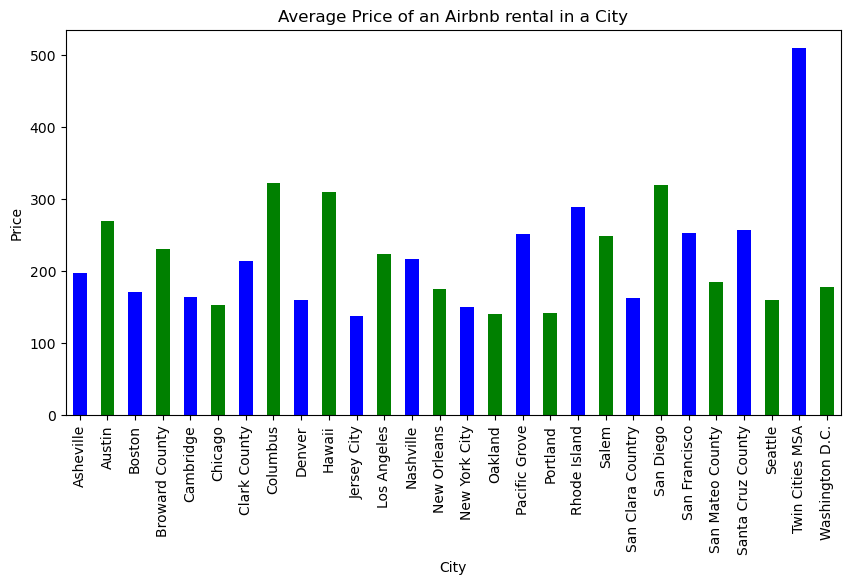

In [88]:
price_city = df_rename.groupby(['City'])['Price'].agg('mean')
ax = price_city.plot(kind = "bar", color=['blue', "green"])
ax.set_ylabel('Price')
ax.set_xlabel("City")
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Average Price of an Airbnb rental in a City')
plt.show()

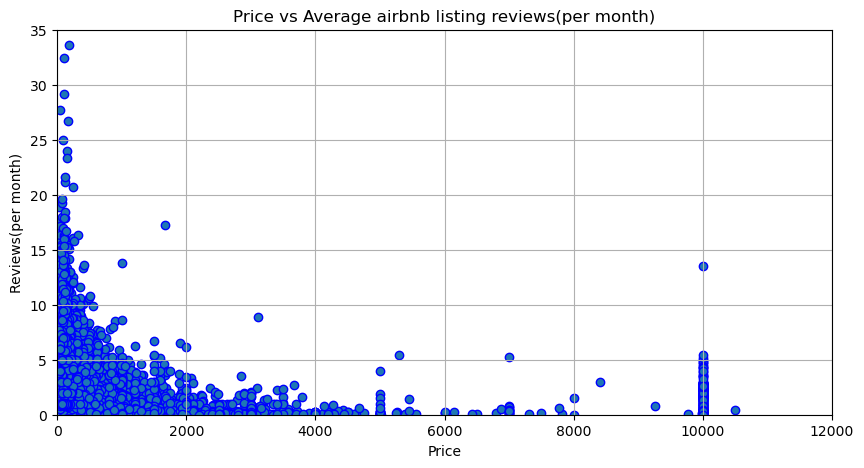

In [90]:
#Scatter plot of number of reviews vs price
plt.scatter(df_rename["Price"], df_rename["Reviews(per month)"], edgecolors= "b")

#Graph Properties
plt.title("Price vs Average airbnb listing reviews(per month)")
plt.xlabel("Price")
plt.ylabel("Reviews(per month)")
plt.xlim(-2,12000)
plt.ylim(0,35)
plt.grid(True)

plt.show()


The r-value is: 0.005259408366168383


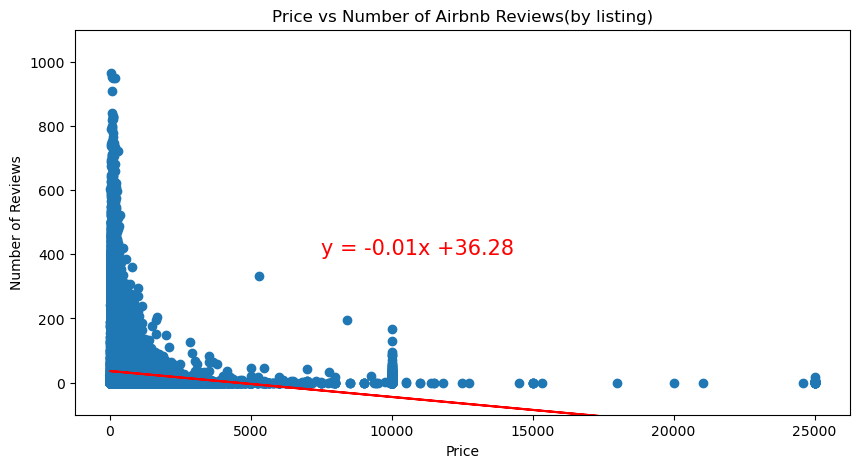

In [112]:
x_values = df_rename["Price"]
y_values = df_rename["Number Of Reviews"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

plt.ylim(-100,1100)
plt.title("Price vs Number of Airbnb Reviews(by listing)")
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.annotate(line_eq,(7500,400),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()


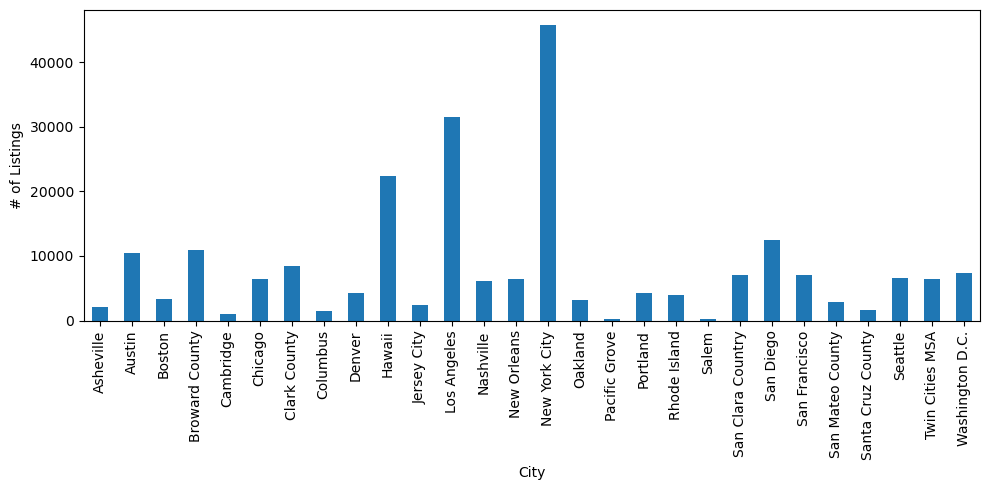

In [91]:
city=df_rename.groupby(["City"])
# Count how many mice appears in each group
listings_per_city = city["City"].count()
# Create a bar chart based off of the group series from before
count_chart = listings_per_city.plot(kind='bar', figsize=(10,5))
# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("City")
count_chart.set_ylabel("# of Listings")
plt.tight_layout()
plt.show()

In [95]:
average_price_city = city["Price"].mean()
average_price_city

City
Asheville            196.639344
Austin               269.290054
Boston               170.331836
Broward County       230.093295
Cambridge            163.072886
Chicago              153.020009
Clark County         213.756660
Columbus             321.718950
Denver               158.860714
Hawaii               309.085986
Jersey City          137.039791
Los Angeles          222.682046
Nashville            215.914155
New Orleans          174.975343
New York City        149.557413
Oakland              139.956617
Pacific Grove        251.111732
Portland             141.029666
Rhode Island         288.720906
Salem                247.727723
San Clara Country    161.721760
San Diego            318.820864
San Francisco        252.018857
San Mateo County     183.909282
Santa Cruz County    257.101209
Seattle              159.720152
Twin Cities MSA      509.906028
Washington D.C.      176.840816
Name: Price, dtype: float64

The r-value is: 7.100218960535736e-05


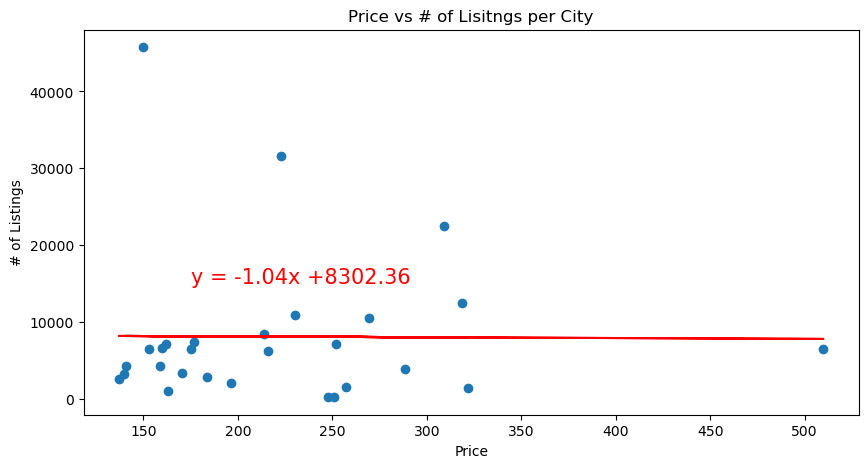

In [111]:
x_values = average_price_city
y_values = listings_per_city
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

plt.title("Price vs # of Lisitngs per City")
plt.xlabel("Price")
plt.ylabel("# of Listings")
plt.annotate(line_eq,(175,15000),fontsize=15,color="red")
#for i, label in enumerate(listings_per_city):
    #plt.annotate(label,(x_values[i],y_values[i]))

print(f"The r-value is: {rvalue**2}")

plt.show()